# Clustering 
1. Hierarchical clustering
2. K-means clustering
3. DBScanner clustering

#### Importing necessary libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth 
from sklearn.neighbors import NearestNeighbors 
from sklearn.mixture import GaussianMixture 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import pdist, squareform
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [25]:
df = pd.read_csv('Processed_Data.csv')

In [26]:
df.head(5)

,vendor_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,...,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,engagement_duration,tot_value_cui,preferred_order_day,preferred_order_hour,age_category
0,2.0,1.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,28.88,0,18,26
1,2.0,2.0,0.0,1.0,12.82,6.39,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,19.21,0,10,16
2,1.0,2.0,0.0,1.0,9.20,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,9.20,0,9,42
3,2.0,1.0,0.0,2.0,0.00,13.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,31.56,1,11,26
4,2.0,0.0,0.0,2.0,14.57,40.87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,55.44,1,8,26


In [27]:
cluster_features = ['vendor_count', 'is_chain', 'first_order', 'last_order', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']

print('cluster_features', cluster_features)

cluster_features ['vendor_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


In [28]:
print(df[cluster_features].dtypes)

vendor_count                float64
is_chain                    float64
first_order                 float64
last_order                  float64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
engagement_duration           int64
tot_value_cui               float64
preferred_order_day           int64
preferred_order_hour          int64
age_category                  int64
dtype: object


With this we can confirm that all features features are numeric (`float64` and `int64`)

In [29]:
print(df.shape)  

(31875, 24)


In [30]:
print(cluster_features) 

['vendor_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


### Hierarchical Clustering 

Linkage Matrix

In [31]:
linkage_matrix = linkage(df[cluster_features].to_numpy(), method='ward')

Dendrogram

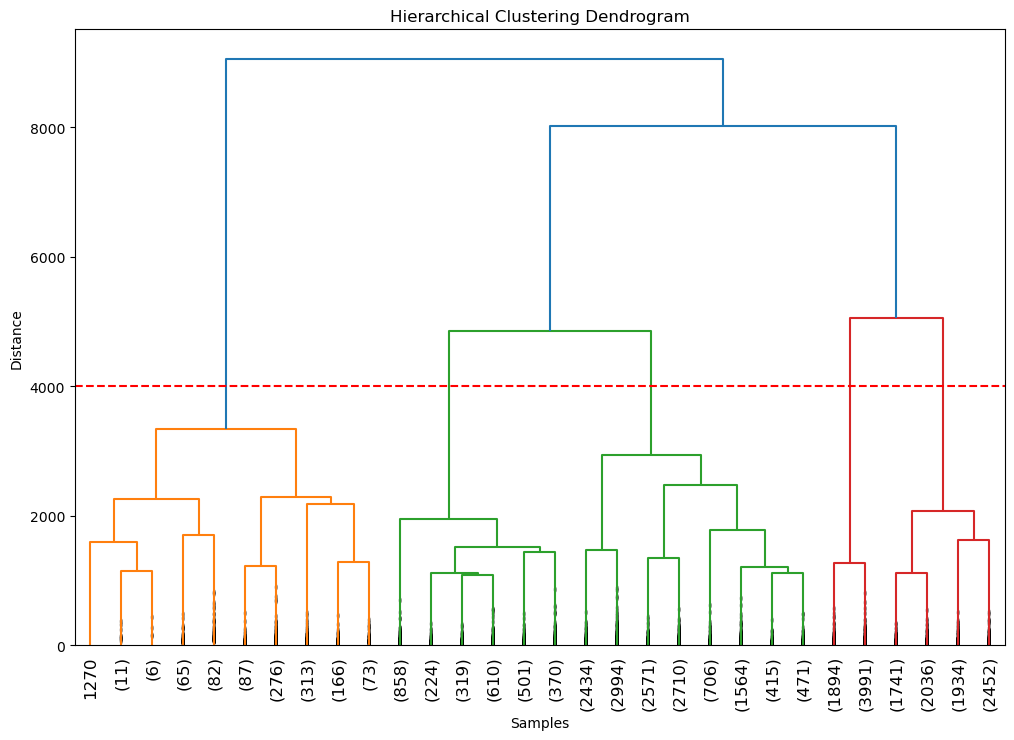

In [32]:
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)

plt.axhline(y=4000, color='r', linestyle='--') 

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Number of clusters

In [33]:
cluster_labels = fcluster(linkage_matrix, t=4000, criterion='distance')

In [34]:
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

Cluster
3    13865
5     8163
4     5885
2     2882
1     1080
Name: count, dtype: int64


##### 1. Dendrogram
The dendrogram was generated using the **Ward's Linkage** method, which minimizes the variation within clusters. 
- The red line represents the **cut-off height** defined at `t=4000`.
- This line determines the number of clusters by "cutting" the dendrogram.
- The branches below the red line correspond to the formed clusters.

##### 2. Clusters
**5 clusters** were identified, with the following sizes:

| Cluster | Number of Samples |
|---------|--------------------|
| 1       | 1080                |
| 2       | 2882             |
| 3       | 13865             |
| 4       | 5885             |
| 5       | 8163             |


### Cluster Analysis: 
The following variables were analyzed across clusters:
- `vendor_count`
- `is_chain`
- `first_order`
- `last_order`
- `engagement_duration`
- `tot_value_cui`
- `preferred_order_day`
- `preferred_order_hour`
- `age_category`

This analysis focuses on identifying patterns and differences in these variables among the clusters.

In [35]:
other_columns = [
    'vendor_count', 'is_chain', 'first_order', 'last_order',
    'engagement_duration', 'tot_value_cui', 
    'preferred_order_day', 'preferred_order_hour', 'age_category' ]

other_analysis = cluster_analysis[other_columns]
print("Analysis of Other Variables by Cluster:")
print(other_analysis)

NameError: name 'cluster_analysis' is not defined

The following cuisine-related variables were analyzed across clusters:
- `CUI_American`
- `CUI_Asian`
- `CUI_Beverages`
- `CUI_Cafe`
- `CUI_Chicken Dishes`
- `CUI_Chinese`
- `CUI_Healthy`
- `CUI_Indian`
- `CUI_Italian`
- `CUI_Japanese`
- `CUI_Noodle Dishes`
- `CUI_OTHER`
- `CUI_Street Food / Snacks`
- `CUI_Thai`

In [ ]:
cuisine_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
    'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
    'CUI_Thai']

cuisine_analysis = cluster_analysis[cuisine_columns]
print("Cuisine Analysis by Cluster:")
print(cuisine_analysis)

#### Cluster Analysis Summary

| **Cluster** | **Vendor Count** | **Is Chain** | **First Order** | **Last Order** | **Engagement Duration** | **Total Value** | **Preferred Order Day** | **Preferred Order Hour** | **Age Category** | **Top Cuisines**                | **Conclusion**                                                                 |
|-------------|------------------|--------------|------------------|----------------|--------------------------|-----------------|--------------------------|--------------------------|------------------|----------------------------------|--------------------------------------------------------------------------------|
| **1**       | 9.01             | 9.37         | 9.53             | 82.30          | 72.77                   | 210.05          | 2.73                     | 10.56                    | 29.12           | Asian, American, Snacks         | High-spending, loyal customers, mostly aged around 29 years, with high engagement, preferring Asian cuisine, snacks, and morning orders. |
| **2**       | 5.91             | 5.74         | 12.46            | 80.56          | 68.10                   | 96.54           | 2.63                     | 10.10                    | 28.87           | Asian, American                 | Moderately spending customers, aged around 28 years, with steady engagement, preferring Asian and American cuisines and morning orders. |
| **3**       | 3.54             | 3.32         | 19.79            | 72.54          | 52.75                   | 34.48           | 2.54                     | 11.53                    | 28.54           | Asian, American                 | Low-spending, moderately engaged customers, aged around 28 years, with delayed first orders, preferring Asian cuisine and mid-morning orders. |
| **4**       | 1.66             | 1.16         | 66.83            | 74.95          | 8.11                    | 18.01           | 2.79                     | 11.71                    | 29.19           | Asian, American                 | Inactive customers, mostly aged around 29 years, with very low spending and engagement, preferring occasional Asian cuisine and late-morning orders. |
| **5**       | 1.62             | 1.25         | 23.34            | 32.05          | 8.71                    | 16.12           | 2.83                     | 11.87                    | 28.62           | Asian, American                 | New or disengaged customers, aged around 28 years, with minimal spending and low engagement, preferring Asian cuisine and late-morning orders. |



### 2. K-Means ###

In [36]:
# Use cluster_features to select relevant columns from your DataFrame
X = df[cluster_features]  # Select only the specified features

In [37]:
# Define the range of clusters to evaluate
range_clusters = range(2, 11)  # k from 2 to 10

# Store silhouette scores
silhouette_scores = []

for k in range_clusters:
    # Initialize and fit K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmeans.fit_predict(X)  # Use selected features from cluster_features
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")


For n_clusters = 2, the silhouette score is 0.472
For n_clusters = 3, the silhouette score is 0.291
For n_clusters = 4, the silhouette score is 0.285
For n_clusters = 5, the silhouette score is 0.295
For n_clusters = 6, the silhouette score is 0.281
For n_clusters = 7, the silhouette score is 0.277
For n_clusters = 8, the silhouette score is 0.225
For n_clusters = 9, the silhouette score is 0.225
For n_clusters = 10, the silhouette score is 0.231


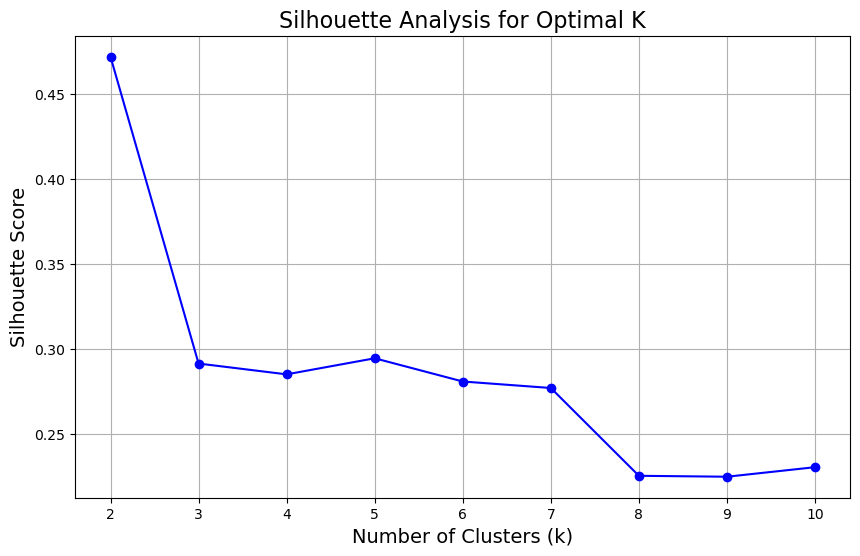

In [38]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Analysis for Optimal K", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [39]:
# Perform K-Means with the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, random_state=1)
cluster_labels = kmeans.fit_predict(df[cluster_features])

# Add the cluster labels to your original DataFrame
df['Cluster'] = cluster_labels

# Inspect the number of observations in each cluster
print(df['Cluster'].value_counts())

Cluster
0    27586
1     4289
Name: count, dtype: int64


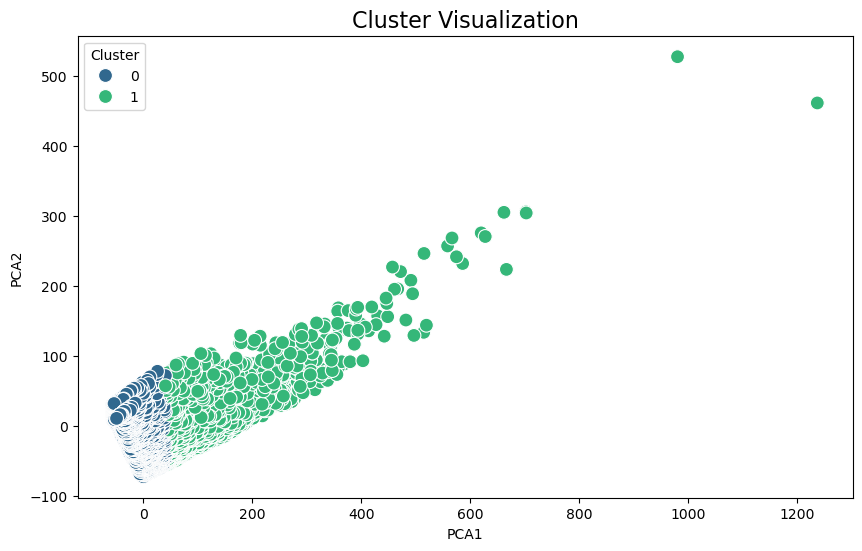

In [40]:
# Reduce to 2 dimensions
pca = PCA(n_components=2, random_state=1)
df['PCA1'] = pca.fit_transform(df[cluster_features])[:, 0]
df['PCA2'] = pca.fit_transform(df[cluster_features])[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Cluster Visualization", fontsize=16)
plt.show()

In [41]:
# Group by the cluster labels and compute the mean of each feature
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
# Temporarily show all rows and columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_analysis)


         vendor_count  is_chain  first_order  last_order  CUI_American  \
Cluster                                                                  
0             2.48521  2.143515    31.077068   61.031429      3.387008   
1             7.07018  7.166239    10.997668   80.658429     14.461856   

         CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  \
Cluster                                                                        
0         5.528154       1.661979  0.381895            0.669260     0.917957   
1        38.429874       6.390427  3.500238            1.406116     4.736747   

         CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  \
Cluster                                                                     
0            0.560349     0.615521    1.250071     2.356979      2.015103   
1            2.971005     3.105691    4.087139     8.880247      9.305164   

         CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai

### **Cluster Analysis Summary**

| **Cluster** | **Vendor Count** | **Is Chain** | **First Order** | **Last Order** | **Engagement Duration** | **Total Value** | **Preferred Order Day** | **Preferred Order Hour** | **Age Category** | **Top Cuisines**                     | **Conclusion**                                                                 |
|-------------|------------------|--------------|------------------|----------------|--------------------------|-----------------|--------------------------|--------------------------|------------------|---------------------------------------|--------------------------------------------------------------------------------|
| **0**       | 2.49             | 2.14         | 31.08            | 61.03          | 29.95                   | 24.69           | 2.67                     | 11.65                    | 28.71           | Asian, American, Snacks              | Low-spending, moderately engaged customers, aged around 28 years, with delayed first orders, preferring Asian and American cuisines and snacks, and late-morning orders. |
| **1**       | 7.07             | 7.17         | 11.00            | 80.66          | 69.66                   | 125.78          | 2.67                     | 10.46                    | 28.86           | Asian, American, Italian, Japanese   | High-spending, highly engaged customers, aged around 28 years, preferring Asian, American, Italian and Japanese cuisines, with early-morning orders. |


### 3. DBSCAN (Density-based spatial clustering of applications with noise)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Scale the data to [0, 1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

# Fit the NearestNeighbors model on the scaled data
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(scaled_data)

# Compute distances to the k-nearest neighbors
distances, _ = neigh.kneighbors(scaled_data)

# Sort distances (take the k-th distance for each point)
distances = np.sort(distances[:, -1])

# Plot the distances
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'Distance to {20}th Nearest Neighbor')
plt.title(f'K-Nearest Neighbors Distance Plot (k=20)')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Set parameters based on the elbow plot
eps = 0.4
min_samples = 5  # Start with a common default value

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df)  # Use the full dataframe

# Get basic statistics
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
n_noise = list(clusters).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Count points per cluster, excluding noise points
if n_clusters > 0:
    points_per_cluster = np.bincount(clusters[clusters != -1])
    print(f"Points per cluster: {points_per_cluster}")
else:
    print("No clusters found (all points are noise).")

# Calculate silhouette score if more than one cluster exists and not all points are noise
if n_clusters > 1 and n_noise != len(clusters):
    mask = clusters != -1  # Exclude noise points
    sil_score = silhouette_score(df[mask], clusters[mask])
    print(f"Silhouette score: {sil_score:.3f}")
else:
    print("Silhouette score cannot be computed (single cluster or all points are noise).")


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=40, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

#usei o eps=30 por causa do grafico
#usei min_samples=10 para dar mais clusters 
# deve ser 2xdim e deve ser mais ou menos isso (24 x 2 = 48) mas assim so da 2


In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([df[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

In [ ]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

In [ ]:
np.unique(dbscan_labels)


In [ ]:
# Visualizar os clusters em um gráfico 2D
from sklearn.decomposition import PCA

# Reduzir os dados a 2 dimensões para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[features_for_clustering])

# Criar um DataFrame com as coordenadas PCA e os rótulos dos clusters
df_plot = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = dbscan_labels

# Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(dbscan_labels):
    cluster_points = df_plot[df_plot['cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualização dos Clusters com DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [ ]:
dbscan = DBSCAN(eps=30, min_samples=40, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df[metric_features])
Counter(dbscan_labels)

In [14]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df[dbscan_labels==-1].copy()

# New df without outliers and 'rcn'
df = df[dbscan_labels!=-1].copy()


In [ ]:
df_out.shape, df.shape

## Mean Shift Clustering

In [ ]:
bandwidth = estimate_bandwidth(df[metric_features], quantile=0.3, random_state=1, n_jobs=-1)
bandwidth

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df[metric_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
import pandas as pd

def plot_clusters(X):
    """
    Plota os dados fornecidos para facilitar a identificação de clusters.

    Parâmetros:
    - X: array-like, forma (n_amostras, 2)
        Dados com 2 dimensões para visualização.
    """
    if X.shape[1] < 2:
        raise ValueError("Os dados precisam ter pelo menos 2 dimensões para plotar.")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.9, edgecolors='k')
    plt.title("Visualização de Clusters nos Dados", fontsize=16)
    plt.xlabel("Dimensão 1", fontsize=12)
    plt.ylabel("Dimensão 2", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


# Carregar os dados de um arquivo CSV
df = pd.read_csv('Processed_Data.csv')

# Garantir que os dados estão no formato NumPy e selecionar as duas primeiras colunas
X = df.iloc[:, :2].values  # Seleciona as duas primeiras colunas

# Plotar os clusters
plot_clusters(X)

## GMM (Gaussian Mixture Model )

python(51446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


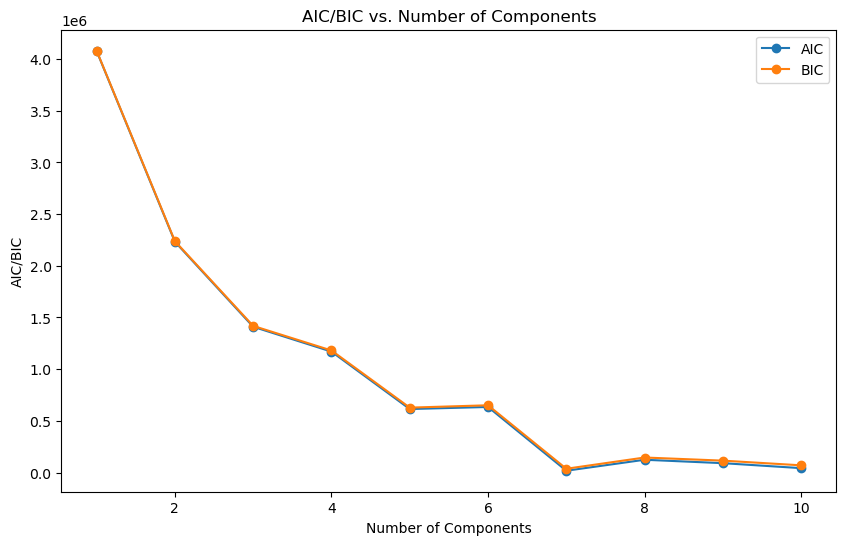

In [16]:
# List to store the AIC and BIC values
aic_values = []
bic_values = []

# Try a range of component numbers (e.g., 1 to 10)
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df)  # Use the entire dataset or scaled data
    aic_values.append(gmm.aic(df))  # Add the AIC value
    bic_values.append(gmm.bic(df))  # Add the BIC value

# Plot the AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), aic_values, label="AIC", marker='o')
plt.plot(range(1, 11), bic_values, label="BIC", marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC/BIC')
plt.title('AIC/BIC vs. Number of Components')
plt.legend()
plt.show()


In [18]:
gmm = GaussianMixture(n_components=6, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df)
labels_proba = gmm.predict_proba(df)

In [19]:
gmm.weights_

array([0.13260786, 0.40843156, 0.3160881 , 0.03291857, 0.09445573,
       0.01549818])

In [20]:
print(f"Cluster assignments: {np.unique(gmm_labels)}")
print(f"Number of data points per cluster: {np.bincount(gmm_labels)}")


Cluster assignments: [0 1 2 3 4 5]
Number of data points per cluster: [ 4226 13032 10071  1048  3001   497]


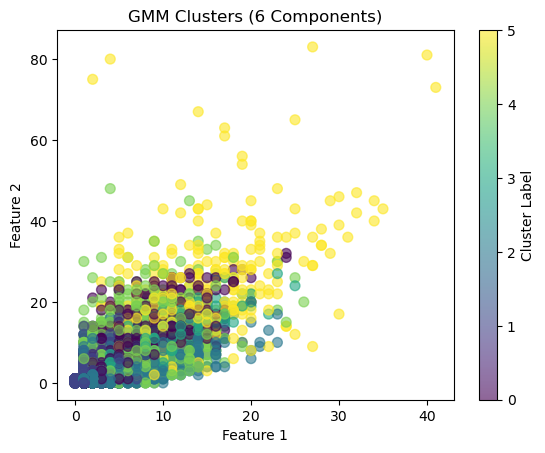

In [21]:
import matplotlib.pyplot as plt

# Visualizing the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('GMM Clusters (6 Components)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()
